<h1>Current Plot<h1>

<h3>Import<h3>

In [4]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m
import statistics as stat

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import seaborn as sns
sns.set_theme()


<h3>Plot<h3>

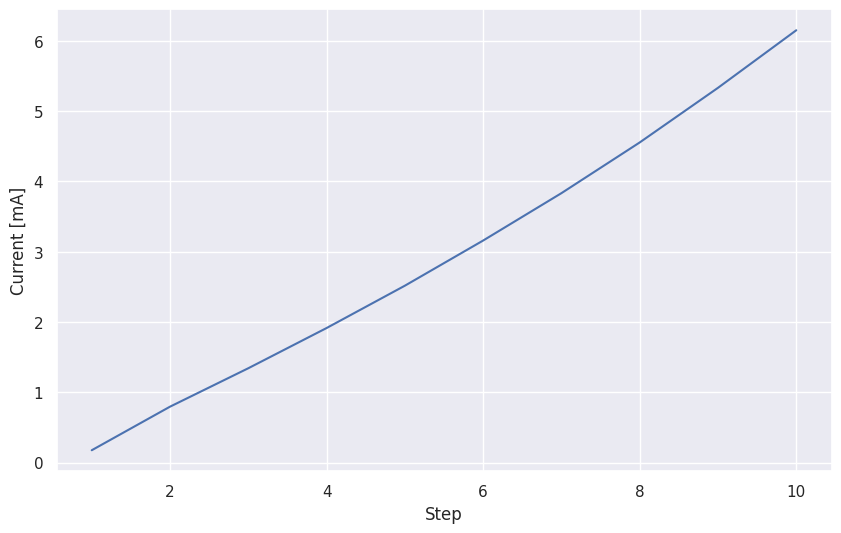

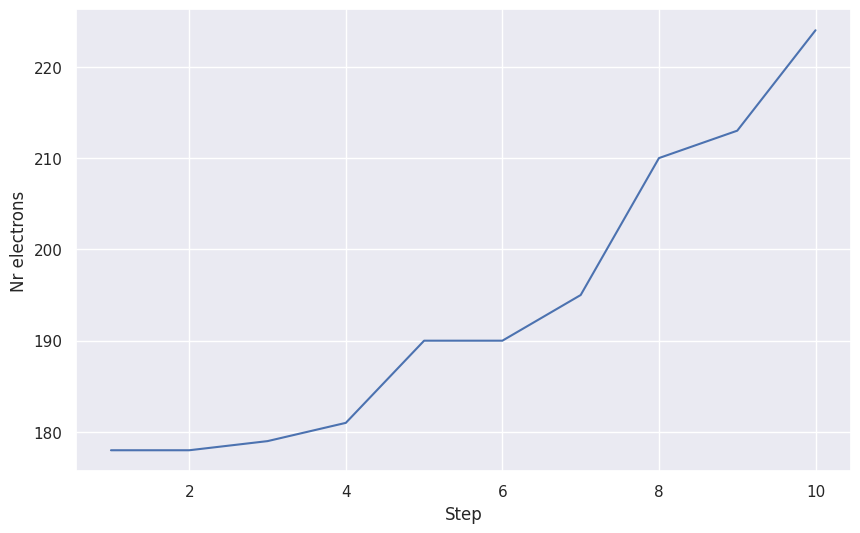

In [5]:
N=10
# Ramo current
# Read the data into a pandas dataframe
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole
filename = './out/ramo_current.dt'
df_cur = pd.read_csv(filepath_or_buffer=filename, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])[:N]
# print(stat.mean(df_cur['current'][-20::])*1e3)  
# Plot current in mA as a function of step
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_cur.index, df_cur['current']*1e3, label='Current')
ax.set_xlabel('Step')
ax.set_ylabel('Current [mA]')
plt.show()

# Plot current in mA as a function of step
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_cur.index, df_cur['nrElec'], label='nrElec')
ax.set_xlabel('Step')
ax.set_ylabel('Nr electrons')
plt.show()


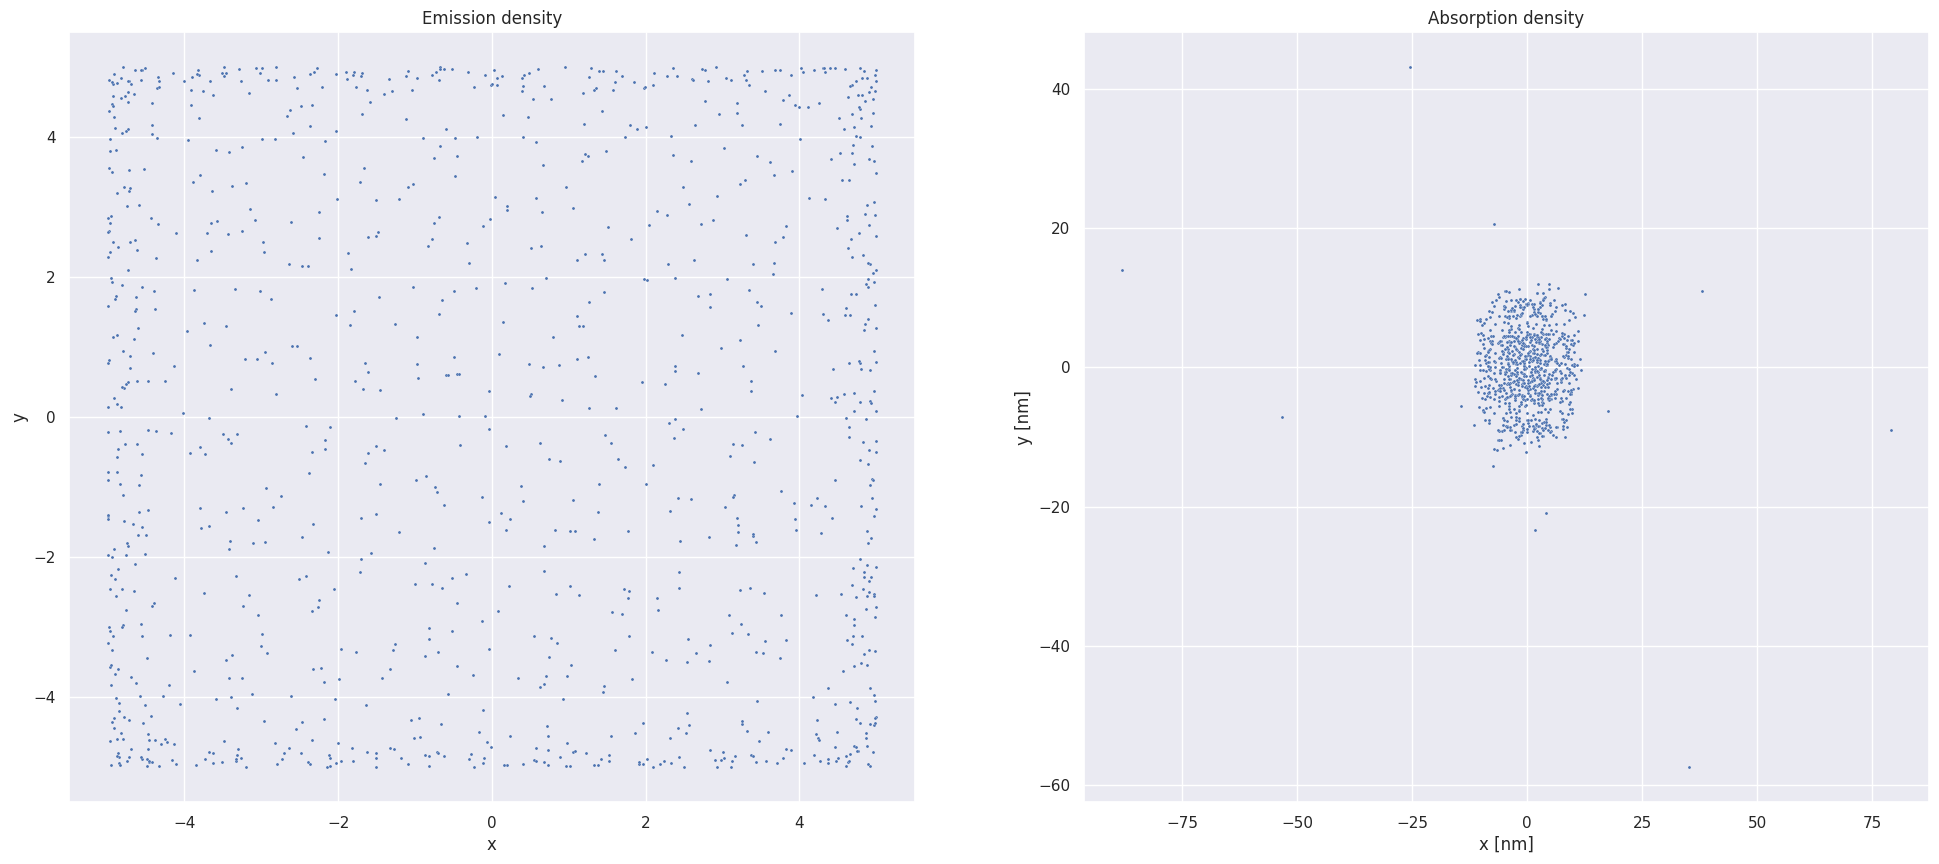

In [6]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import math

import seaborn as sns
sns.set_theme()

import os.path as path

# Emission density
fig2, axes = plt.subplots(1, 2, figsize=(24, 10))


filename = './out/density_emit_elec.bin'

# Binary file layout
# float64 (double precision numbers)
# int32 (32bit integers)
dt_emit_type = np.dtype([('x', np.float64), ('y', np.float64), ('z', np.float64), ('emit', np.int64), ('nr', np.int64)])

# Memory map the file
# mode=r (Read only)
# order=F (Fortran style array)
data_mem_emit = np.memmap(filename, dtype=dt_emit_type, mode='r', order='F')
    
# Read the data into dataframe
df_emit = pd.DataFrame.from_records(data=data_mem_emit, columns=data_mem_emit.dtype.names)
    
# Add first joint plot (top right)
sns.scatterplot(data=df_emit, x="x", y="y", s=5, ax=axes[0])
axes[0].set_title('Emission density')

# Absorption density
filename = './out/density_absorb_top.bin'

# Binary file layout
# float64 (double precision numbers)
# int32 (32bit integers)
dt_abs_type = np.dtype([('x [nm]', np.float64), ('y [nm]', np.float64), ('vx', np.float64), ('vy', np.float64), ('vz', np.float64), ('emit', np.int64), ('sec', np.int64),  ('id', np.int64)])

# Memory map the file
# mode=r (Read only)
# order=F (Fortran style array)
data_mem_abs = np.memmap(filename, dtype=dt_abs_type, mode='r', order='F')
    
# Read the data into dataframe
sample_data = pd.DataFrame.from_records(data=data_mem_abs, columns=data_mem_abs.dtype.names)

# Add first joint plot (bottom right)
sns.scatterplot(data=sample_data, x="x [nm]", y="y [nm]", s=5, ax=axes[1])
axes[1].set_title('Absorption density')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.1)

# Show the plot
plt.show()